In [249]:
import numpy as np
from toolz.curried import pipe, curry
import matplotlib.pyplot as plt

%matplotlib inline

In [250]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

In [251]:
@curry
def xentropy(y, x):
    return -np.log(x[range(len(y)), y])

In [252]:
@curry
def nn(w, b, x):
    return np.dot(x,  w) + b

In [253]:
def relu(x):
    return np.maximum(0, x)

In [254]:
@curry
def loss(reg, weights, x):
    w0 = weights['w0']
    w1 = weights['w1']
    return np.sum(x) / len(x) + 0.5 * reg * (np.sum(w0 * w0) + np.sum(w1 * w1)) 

In [255]:
def calc_layers(x, y, weights, reg):
    return pipe(
        x,
        nn(weights['w0'], weights['b0']),
        relu,
        nn(weights['w1'], weights['b1']),
        softmax,
        xentropy(y),
        loss(reg, weights)
    )

In [256]:
def init(shape):
    return 0.01 * (2 * np.random.random(shape) - 1)

In [258]:
def init_weights(shapes):
    return dict(
        w0=init((shapes[0], shapes[1])),
        w1=init((shapes[1], shapes[2])),
        b0=np.zeros(shapes[1]),
        b1=np.zeros(shapes[2])
    )

In [259]:
Nsample = 10
Nfeature = 20
N0 = 15
Nclass = 3
reg = 1e-3

expected = np.random.choice(np.arange(Nclass), size=(Nsample,))
inputs = 2 * np.random.random((Nsample, Nfeature)) - 1
weights = init_weights((Nfeature, N0, Nclass))

loss_ = calc_layers(inputs, expected, weights, reg)
print(loss_)

1.0985490240236615


(300, 2)
(300,)


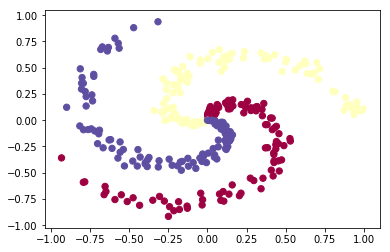

In [247]:
def get_data():
    N = 100 # number of points per class
    D = 2 # dimensionality
    K = 3 # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
      ix = range(N*j,N*(j+1))
      r = np.linspace(0.0,1,N) # radius
      t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      y[ix] = j
    return X, y
    
x, y = get_data()
print(x.shape)
print(y.shape)
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d